# ADCampaign Data Exploration

   ## Data Understanding

In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [13]:
df = pd.read_csv('../data/AdSmartABdata.csv', isna = )
df

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
...,...,...,...,...,...,...,...,...,...
8072,ffea24ec-cec1-43fb-b1d1-8f93828c2be2,exposed,2020-07-05,7,Generic Smartphone,6,Chrome Mobile,0,0
8073,ffea3210-2c3e-426f-a77d-0aa72e73b20f,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0
8074,ffeaa0f1-1d72-4ba9-afb4-314b3b00a7c7,control,2020-07-04,9,Generic Smartphone,6,Chrome Mobile,0,0
8075,ffeeed62-3f7c-4a6e-8ba7-95d303d40969,exposed,2020-07-05,15,Samsung SM-A515F,6,Samsung Internet,0,0


In [16]:
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

In [18]:
for i in ["n/a", "na", "undefined"]:
    if i in df:
        print(f'{i} present')
    else:
        print('Absent')

Absent
Absent
Absent


This is used to determine whether there are cells in the dataset that contain the listed values which are same as having null values. If they wer present, we would have been prompted to fill them in appropriate ways

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [25]:
df.shape

(8077, 9)

In [26]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


## Univariate Analysis

In [28]:
#Unique value counts of categorical variables and their plots

#Unique value counts of device_make
df['device_make'].count()

270

In [64]:
df['device_make'].value_counts()[:10]

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
Samsung SM-G930F       100
Samsung SM-G975F        97
Samsung SM-A202F        88
Samsung SM-A405FN       87
Samsung SM-J330FN       69
Name: device_make, dtype: int64

In [77]:
def plot_univariate(x, title):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=x)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

A function that plots the univariate analysis of the input variable specifying the number of variable to be displayed

<AxesSubplot:title={'center':'Device make Total Counts'}, xlabel='device_make', ylabel='Counts'>

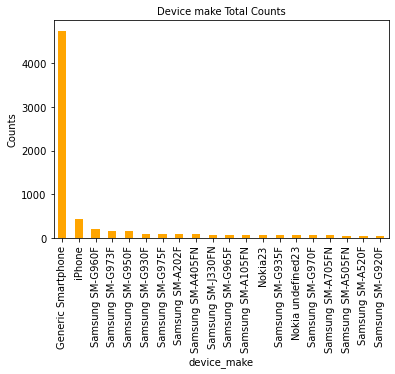

In [98]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('device_make', fontsize=10)
ax.set_ylabel('Counts' , fontsize=10)
ax.set_title('Device make Total Counts', fontsize=10)
df['device_make'].value_counts()[:20].plot(ax=ax, kind='bar', color='orange')

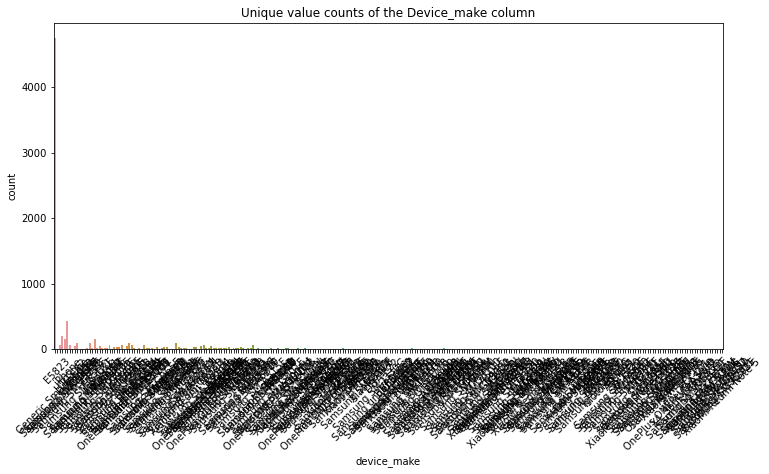

In [78]:

plot_univariate('device_make', 'Unique value counts of the Device_make column')

In [43]:
#Unique value count for browser of the user

df['browser'].nunique()

15

In [44]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Firefox Mobile                   1
Android                          1
Puffin                           1
Opera Mini                       1
Edge Mobile                      1
Name: browser, dtype: int64

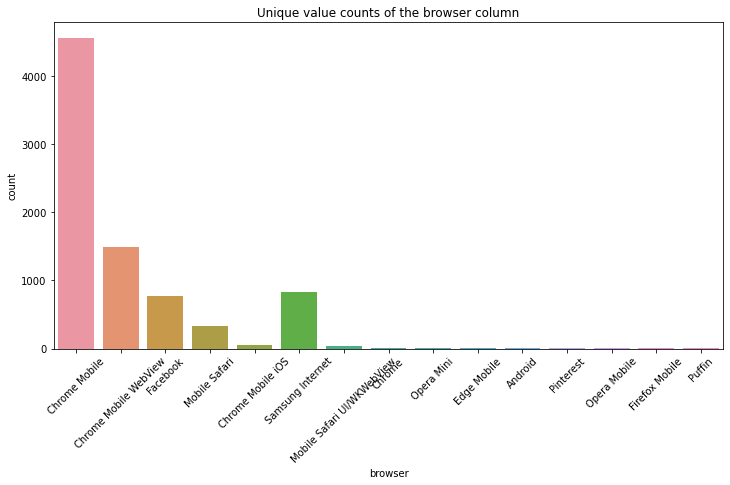

In [55]:
plot_univariate('browser', 'Unique value counts of the browser column')

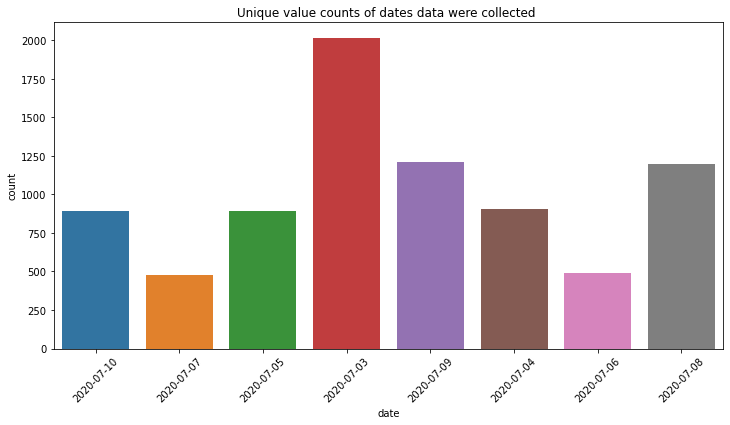

In [57]:
#Unique value count for date

df['date'].nunique()
plot_univariate('date', 'Unique value counts of dates data were collected ')

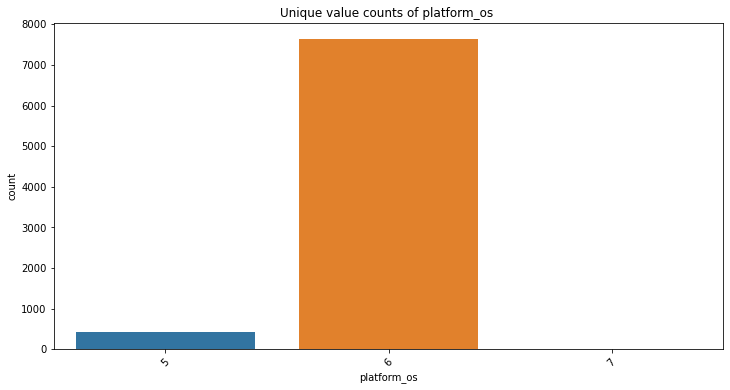

In [58]:
#Unique value count for platform_os

df['platform_os'].nunique()
plot_univariate('platform_os', 'Unique value counts of platform_os ')

# platform_os

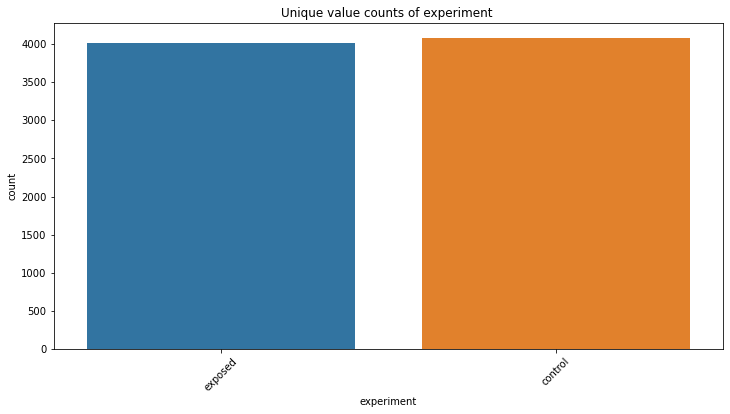

In [59]:
#Unique value count for experiment
plot_univariate('experiment', 'Unique value counts of experiment ')

# experiment

In [88]:
# unique number of people who are aware of the company
counts_yes = df['yes'].value_counts()[1]
counts_yes

572

In [89]:
# unique number of people who are not aware of the company
counts_no = df['no'].value_counts()[1]
counts_no

671

In [93]:
#Number of people who did not respond to the questionnaire
df.shape[0] - (counts_yes + counts_no)

6834

## Bivariate Analysis

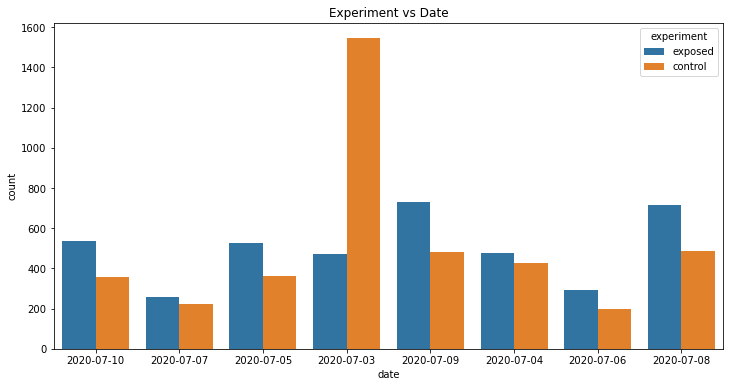

In [94]:
# data against experiment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="date", hue="experiment")
plt.title('Experiment vs Date')
plt.show()


The graphs determine the total number of responses generated from both the control and exposed group within the specified days

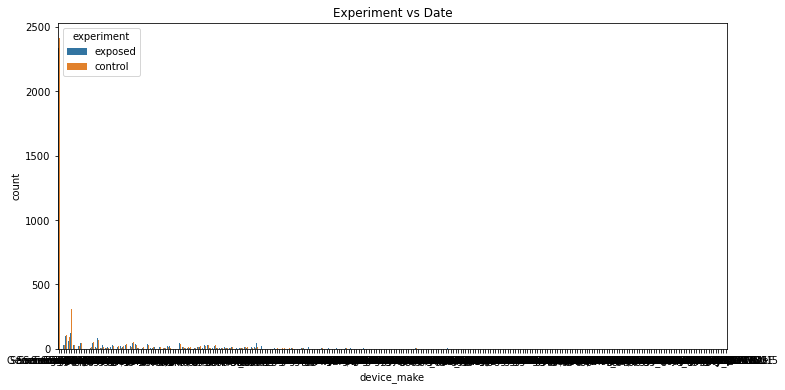

In [96]:
# device_make
 pd.DataFrame(user_data['Total_UL_and_DL_(Bytes)'].value_counts()).head(50)

# data against experiment
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="device_make", hue="experiment")
plt.title('Experiment vs Date')
plt.show()